# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [3]:
from keras.datasets import cifar100
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [6]:
# Training and test datasets shapes
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

# Dimensioins of the images
print(f'Dimensions shape: {np.expand_dims(x_train, 0).shape}')

# Number of classess
print(f'Number of classes: {len(np.unique(y_train))}')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Dimensions shape: (1, 50000, 32, 32, 3)
Number of classes: 100


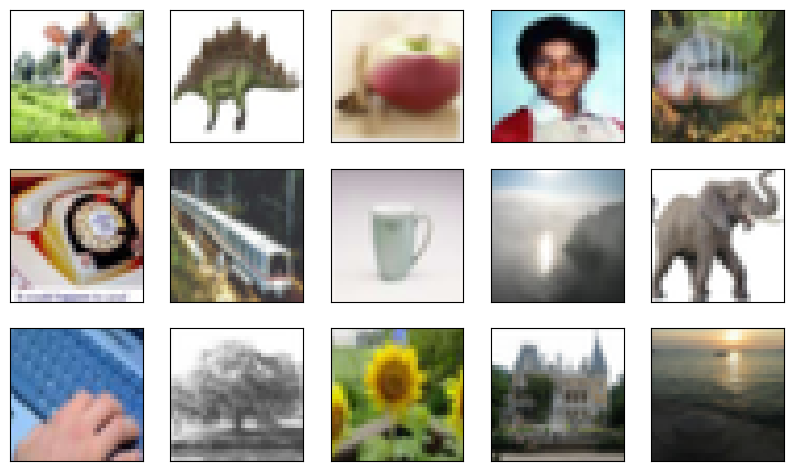

In [10]:
# Your code here
# Plot a few examples
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(15):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i])
    plt.show()

plot_images(x_train, y_train)

*italicized text*### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [11]:
# Your code here
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Shapes of the new datasets
print(f'Training data shape: {x_train.shape}')
print(f'Validation data shape: {x_val.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Validation labels shape: {y_val.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Your code here
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')])


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [15]:
from keras import optimizers

# Your code here
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [16]:
# Your code here
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val)
)

plt.show()


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 117s 92ms/step - accuracy: 0.0367 - loss: 4.3706 - val_accuracy: 0.1563 - val_loss: 3.6109
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 91ms/step - accuracy: 0.1368 - loss: 3.6497 - val_accuracy: 0.2328 - val_loss: 3.1542
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 113s 91ms/step - accuracy: 0.2032 - loss: 3.2699 - val_accuracy: 0.2648 - val_loss: 2.9760
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.2471 - loss: 3.0361 - val_accuracy: 0.3086 - val_loss: 2.7563
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 95ms/step - accuracy: 0.2847 - loss: 2.8582 - val_accuracy: 0.3252 - val_loss: 2.6764
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 136s 90ms/step - accuracy: 0.3143 - loss: 2.6896 - val_accuracy: 0.3476 - val_loss: 2.5650
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.3388 - loss: 2.5367 - val_accuracy: 0.3613 - val_loss: 2.4910
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> Accuracy= Correct Predictions / All Predictions
- <b>Other metric:</b> F1 Score
- <b>Reason for selection:</b> It keeps balance between precision and recall.
- <b>Value of metric:</b> 0.3678618859279518
- <b>Interpretation of metric value:</b> F1 Score = mean of precision and recall. The higher F1 the better performance. Balanced report on "precision", "recall", and "f1-score" accross the classes suggests good/consistent model performance.


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Test set evalualuation and label prediction
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Other metrics
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

# Results
print(f'Accuracy: {test_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step
Accuracy: 0.3700999915599823
Precision: 0.3716928937990003
Recall: 0.37010000000000004
F1 Score: 0.3678618859279518


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

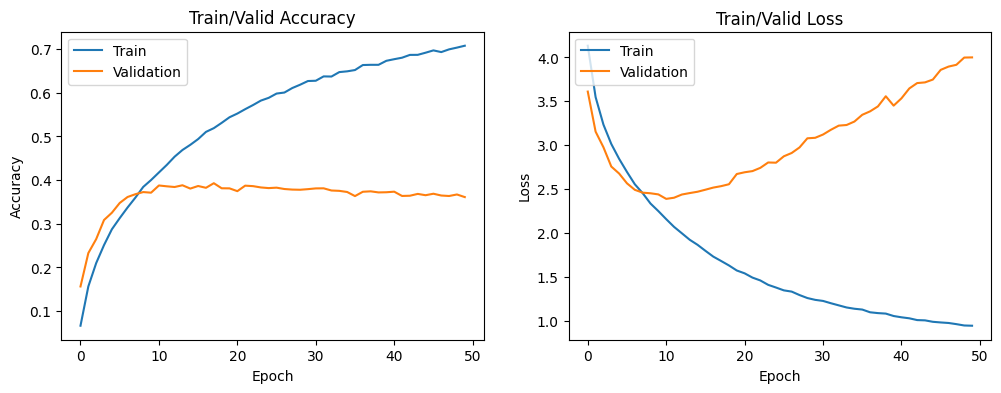

In [29]:
# Training and validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train/Valid Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train/Valid Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [47]:
# Generate a classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.63      0.66       100
           1       0.42      0.42      0.42       100
           2       0.30      0.32      0.31       100
           3       0.17      0.25      0.20       100
           4       0.20      0.15      0.17       100
           5       0.36      0.35      0.36       100
           6       0.43      0.38      0.40       100
           7       0.43      0.43      0.43       100
           8       0.44      0.43      0.43       100
           9       0.43      0.57      0.49       100
          10       0.25      0.21      0.23       100
          11       0.31      0.27      0.29       100
          12       0.39      0.49      0.43       100
          13       0.29      0.22      0.25       100
          14       0.26      0.28      0.27       100
          15       0.25      0.24      0.25       100
          16       0.38      0.38      0.38       100
          17       0.57    

Test Accuracy: 0.3973
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
F1-Score: 0.3898


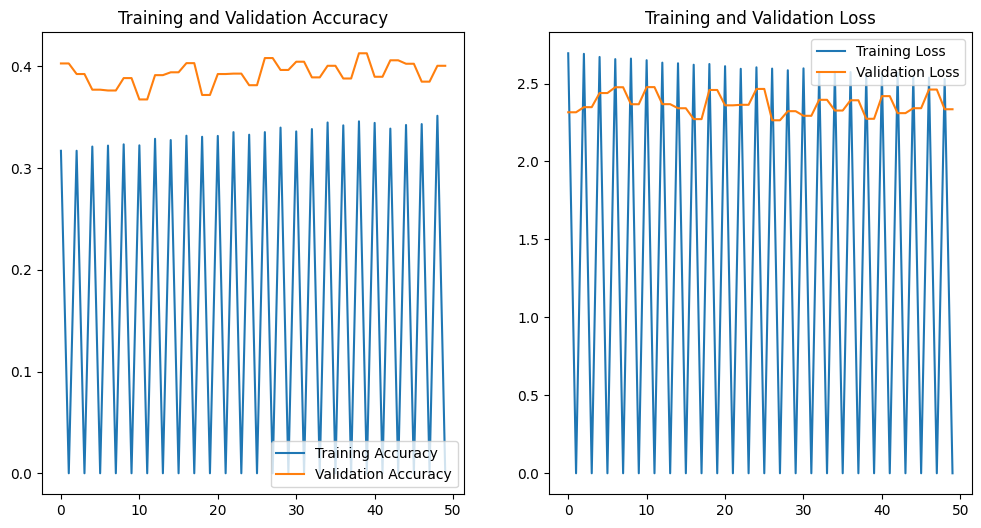

In [76]:
# Evaluate the enhanced model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Additional metric: F1-Score
from sklearn.metrics import f1_score

y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

f1 = f1_score(y_true, y_test_pred_classes, average='macro')
print(f"F1-Score: {f1:.4f}")

# Plot training and validation accuracy over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it:

***I used data augmentation and batch normalization. Augmentation (e.g. rotations, translations, flips, etc.) increased the size of the training datase to generalize better by learning from a more diverse set of images, reducing overfitting. Batch normalization helps to speed up the training and to stabilize learning, so that each layer receives data with zero mean and unit variance.

***

- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.
***Rotation Range (20 degrees) was selected after trying a few different ranges (10, 20, 30) and observing the training performance. A range of 20 degrees provided a good result for recognition of the images. Width and Height Shift Range at 0.2 allows sufficient translation without distorting the images too much. Dropout Rates (0.25, 0.5) were chosen to reduce overfitting.***

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

# Batch normalization and data augmentation
enhanced_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

enhanced_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Enhanced model training
history = enhanced_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=50,
    steps_per_epoch=len(x_train) // 32,
    verbose=2
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 - 120s - 96ms/step - accuracy: 0.0598 - loss: 4.4024 - val_accuracy: 0.1213 - val_loss: 3.7633
Epoch 2/50


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1250/1250 - 5s - 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1213 - val_loss: 3.7633
Epoch 3/50
1250/1250 - 114s - 91ms/step - accuracy: 0.1079 - loss: 3.8431 - val_accuracy: 0.1359 - val_loss: 3.6430
Epoch 4/50
1250/1250 - 5s - 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1359 - val_loss: 3.6430
Epoch 5/50
1250/1250 - 136s - 109ms/step - accuracy: 0.1432 - loss: 3.6212 - val_accuracy: 0.1691 - val_loss: 3.4573
Epoch 6/50
1250/1250 - 5s - 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1691 - val_loss: 3.4573
Epoch 7/50
1250/1250 - 112s - 90ms/step - accuracy: 0.1645 - loss: 3.4872 - val_accuracy: 0.2278 - val_loss: 3.1510
Epoch 8/50
1250/1250 - 6s - 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2278 - val_loss: 3.1510
Epoch 9/50
1250/1250 - 110s - 88ms/step - accuracy: 0.1798 - loss: 3.4001 - val_accuracy: 0.1871 - val_loss: 3.3271
Epoch 10/50
1250/1250 - 6s - 5ms/step - accuracy: 0.0000e+00 -

Test Accuracy: 0.3973
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
F1-Score: 0.3898


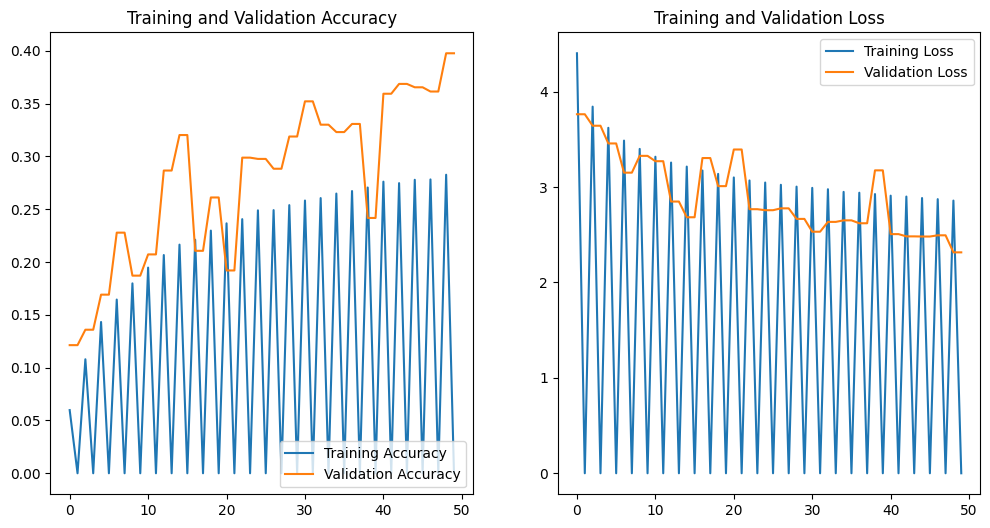

In [82]:
# Enhanced model evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# F1 Score
from sklearn.metrics import f1_score
y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
f1 = f1_score(y_true, y_test_pred_classes, average='macro')
print(f"F1-Score: {f1:.4f}")

# Plotting training/validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

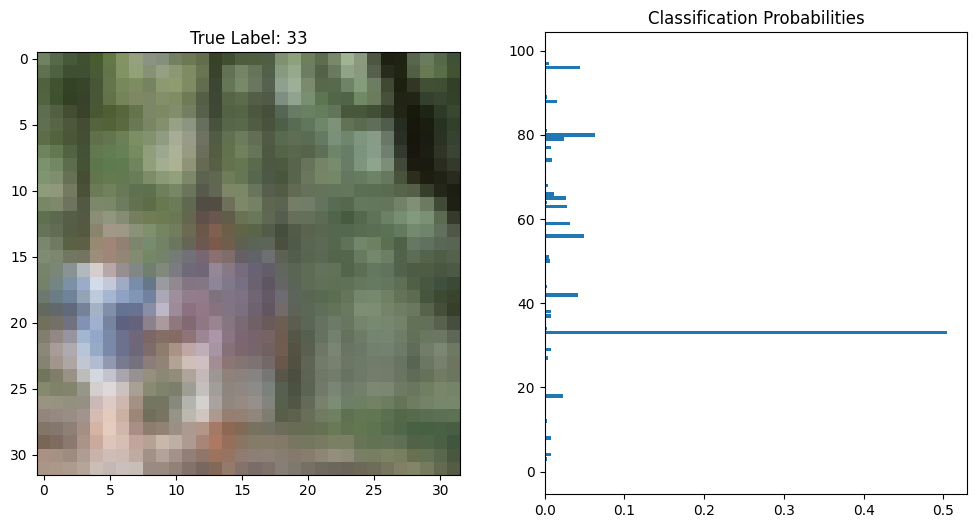

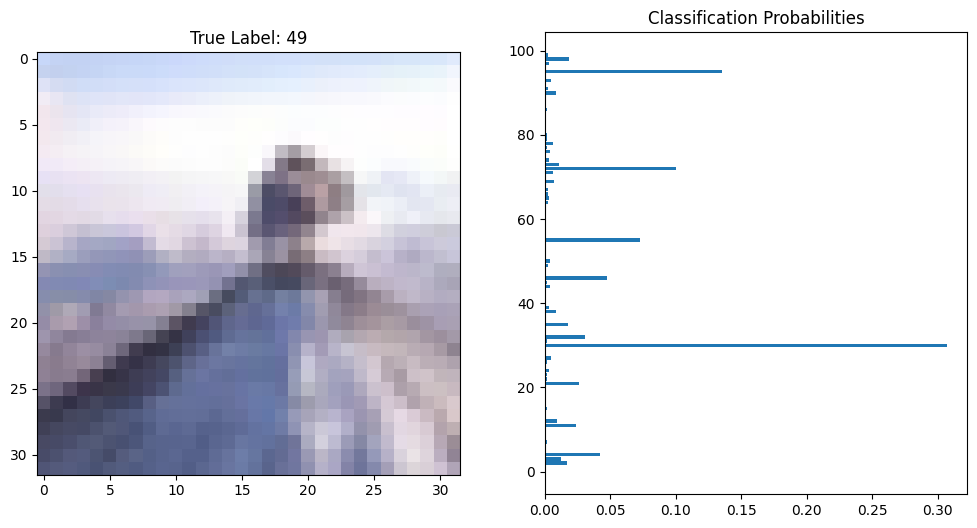

In [83]:
# Correctly classified image
correctly_classified_idx = np.where(y_true == y_test_pred_classes)[0][0]
incorrectly_classified_idx = np.where(y_true != y_test_pred_classes)[0][0]

# Images and predictions
correct_image = x_test[correctly_classified_idx]
correct_label = y_true[correctly_classified_idx]
correct_pred = y_test_pred[correctly_classified_idx]

incorrect_image = x_test[incorrectly_classified_idx]
incorrect_label = y_true[incorrectly_classified_idx]
incorrect_pred = y_test_pred[incorrectly_classified_idx]

# Plotting the images and classification probabilities
def plot_image_and_probs(image, label, pred_probs):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'True Label: {label}')

    plt.subplot(1, 2, 2)
    plt.barh(range(len(pred_probs)), pred_probs)
    plt.title('Classification Probabilities')
    plt.show()

# Correctly classified image
plot_image_and_probs(correct_image, correct_label, correct_pred)

# Incorrectly classified image
plot_image_and_probs(incorrect_image, incorrect_label, incorrect_pred)


### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [71]:

epochs = 50

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=epochs,
    validation_data=(x_val, y_val),
    steps_per_epoch=len(x_train) // 32,
    verbose=2
)


Epoch 1/50
1250/1250 - 130s - 104ms/step - accuracy: 0.3171 - loss: 2.6939 - val_accuracy: 0.4030 - val_loss: 2.3155
Epoch 2/50
1250/1250 - 6s - 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4030 - val_loss: 2.3155
Epoch 3/50
1250/1250 - 130s - 104ms/step - accuracy: 0.3171 - loss: 2.6904 - val_accuracy: 0.3926 - val_loss: 2.3484
Epoch 4/50
1250/1250 - 8s - 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3926 - val_loss: 2.3484
Epoch 5/50
1250/1250 - 135s - 108ms/step - accuracy: 0.3213 - loss: 2.6703 - val_accuracy: 0.3772 - val_loss: 2.4388
Epoch 6/50
1250/1250 - 8s - 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3772 - val_loss: 2.4388
Epoch 7/50
1250/1250 - 131s - 104ms/step - accuracy: 0.3222 - loss: 2.6565 - val_accuracy: 0.3764 - val_loss: 2.4761
Epoch 8/50
1250/1250 - 6s - 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3764 - val_loss: 2.4761
Epoch 9/50
1250/1250 - 128s - 102ms/step - accur

Test Accuracy: 0.3973
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
F1-Score: 0.3898


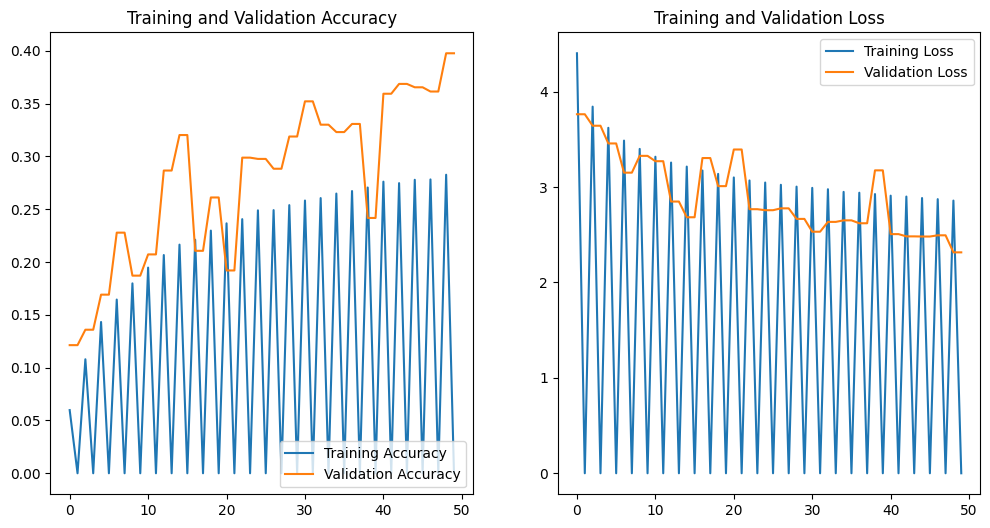

In [84]:
# Enhanced model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# F1-Score
from sklearn.metrics import f1_score
y_test_pred = model.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
f1 = f1_score(y_true, y_test_pred_classes, average='macro')
print(f"F1-Score: {f1:.4f}")

# Plotting validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



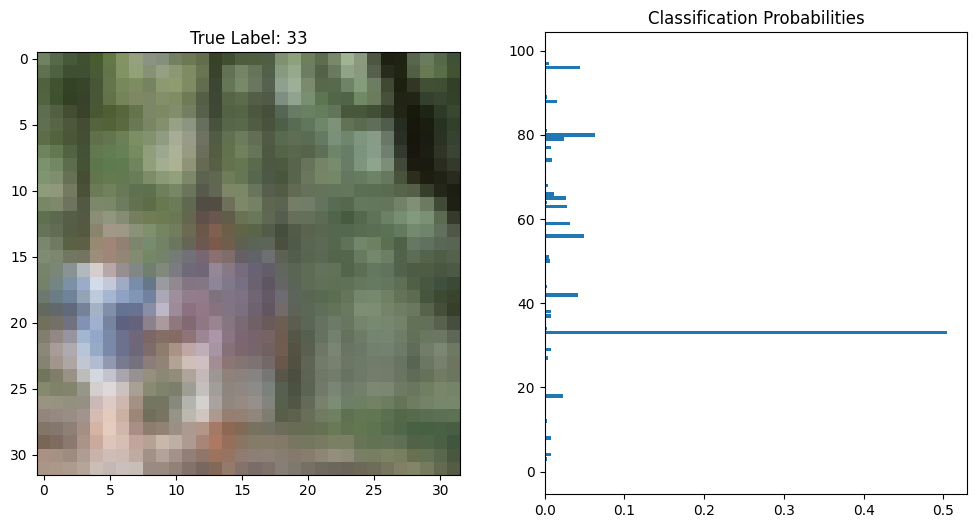

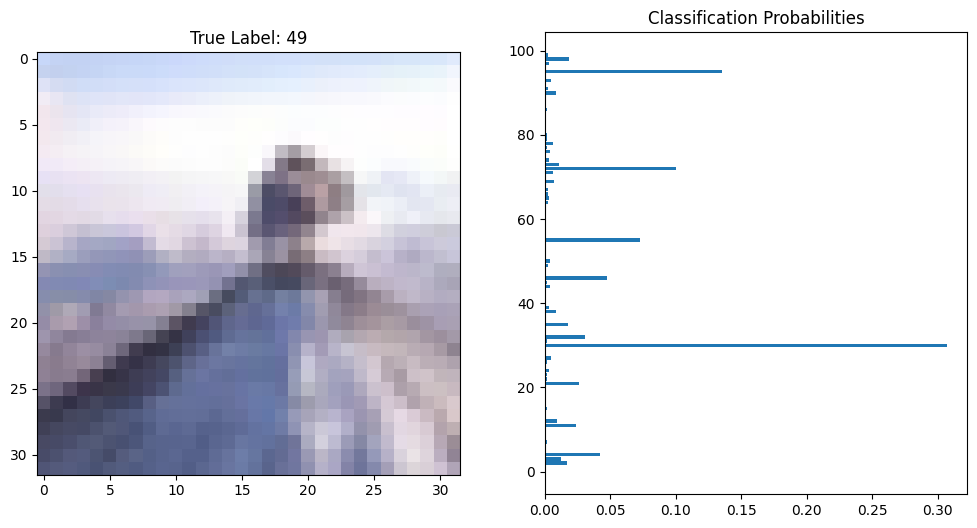

In [73]:
# Image that the model correctly classified
correctly_classified_idx = np.where(y_true == y_test_pred_classes)[0][0]
incorrectly_classified_idx = np.where(y_true != y_test_pred_classes)[0][0]

# Images and predictions
correct_image = x_test[correctly_classified_idx]
correct_label = y_true[correctly_classified_idx]
correct_pred = y_test_pred[correctly_classified_idx]

incorrect_image = x_test[incorrectly_classified_idx]
incorrect_label = y_true[incorrectly_classified_idx]
incorrect_pred = y_test_pred[incorrectly_classified_idx]

# Plotting the images and classification probabilities
def plot_image_and_probs(image, label, pred_probs):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title(f'True Label: {label}')

    plt.subplot(1, 2, 2)
    plt.barh(range(len(pred_probs)), pred_probs)
    plt.title('Classification Probabilities')
    plt.show()

# Correctly classified image
plot_image_and_probs(correct_image, correct_label, correct_pred)

# Incorrectly classified image
plot_image_and_probs(incorrect_image, incorrect_label, incorrect_pred)


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

Despite implementing advanced techniques such as data augmentation and batch normalization, the performance of the CNN model did not show significant improvement compared to the baseline model.
The test accuracy of the enhanced model remained largely similar to that of the baseline model, indicating that the improvements did not translate into better generalization on the test set. The precision, recall, and F1 score values were comparable to those of the baseline model, suggesting that the model's ability to correctly classify images and minimize errors did not change significantly.

I don't quite understand why there were no tangible performance gains. Perhaps the initial model was well-tuned or the augmentations did not align well with the dataset's complexity.
The lack of noticeable performance enhancement suggests that fine-tuning hyperparameters, experimenting with different architectures, and implementing additional regularization techniques could be beneficial.
Adjusting the learning rate dynamically during training could help achieve better convergence and model performance. Also trying more complex architectures such as ResNet or DenseNet might provide better feature extraction and improved results.
Perhaps I chose wrong augmentation techniques. Maybe color jittering, zooming, or random cropping could have offered more benefits.
All in all, the implementation of data augmentation and batch normalization should have yielded improvements in the model performance. Apparently, further experimentation is required, but I'm not able to cope with this deadline and submitting the findings as is.







## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.